<CENTER style="font-size:40px;">Experiment 8</CENTER>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table style="width: 100%;">
  <tr>
    <td>Name</td>
    <td>Pranay Singhvi</td>
  </tr>
  <tr>
    <td>UID</td>
    <td>2021300126</td>
  </tr>
</table>


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../1_/Honour.jpeg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      Regression Analysis on Real-time data


1. Pick up 3 stocks from the S&P500 index (or any other index of interest) and fetch their data from 2010-01-01 to present date into a pandas dataframe
2. Train a regression model using OLS in statsmodels library on 80% of the historic data for each stock, and predict on the recent 20%
3. Print the model summary and explain what do each of the components in the report summary mean
4. Evaluate the fitted model on various statistical metrics for error on 'train' and 'test'
5. Assess the model on metrics that calculate goodness of fit on 'train' and 'test'

Add plots of the Actuals, Predictions and Residuals for each of the stocks
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">THEORY</td>
    <td class="tg-0pky col2">
    The above experiment involves training regression models using historical stock price data for selected companies and then evaluating the performance of these models. Here's a theoretical overview of each step in the experiment:

1. **Data Collection**:
   - Historical stock price data for chosen companies is collected from a reliable financial data source like Yahoo Finance.
   - The data typically includes the adjusted closing prices of stocks, which accounts for corporate actions such as dividends and stock splits.

2. **Model Training**:
   - The historical stock price data is divided into features (independent variables) and the target variable (stock prices).
   - An Ordinary Least Squares (OLS) regression model is trained using the statsmodels library in Python.
   - The model is trained on 80% of the historical data while the remaining 20% is kept for testing.

3. **Model Evaluation**:
   - The trained model is evaluated using various statistical metrics to assess its performance on both the training and testing datasets.
   - Metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared are calculated.
   - These metrics provide insights into how well the model fits the data and its predictive accuracy.

4. **Goodness of Fit Assessment**:
   - The goodness of fit of the model is further assessed by comparing actual stock prices with predicted values and analyzing the residuals (the differences between actual and predicted values).
   - Line graphs are plotted to visualize the trends in actual vs. predicted stock prices and the distribution of residuals over time.
   - A well-fitted model should exhibit a close alignment between actual and predicted values and residual values should be randomly distributed around zero.

5. **Interpretation**:
   - The model summary, which includes coefficients, p-values, and other statistical measures, provides insights into the relationships between the independent variables (features) and the target variable (stock prices).
   - Coefficients indicate the strength and direction of the relationship between each feature and the target variable.
   - P-values indicate the statistical significance of each coefficient, with lower p-values suggesting greater significance.

Overall, this experiment aims to build and evaluate regression models to predict stock prices based on historical data, providing insights into the performance and reliability of the models for investment decision-making.
  </td>
  </tr>
</tbody>
</table> 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Fetching Stock Data and Preprocessing
def fetch_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        stock_data[ticker] = data['Adj Close']
    return pd.DataFrame(stock_data)


In [ ]:
# Step 2: Training Regression Model
def train_ols_model(df):
    X = sm.add_constant(df.iloc[:, 1:])  # Features
    y = df.iloc[:, 0]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = sm.OLS(y_train, X_train).fit()
    return model, X_train, X_test, y_train, y_test

In [ ]:
# Step 3: Printing Model Summary
def print_model_summary(model, ticker):
    print(f"Summary for {ticker}:")
    print(model.summary())
    print("\n")

In [ ]:
# Step 4: Evaluating the Fitted Model
def evaluate_model(model, X_train, X_test, y_train, y_test, ticker):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"Evaluation for {ticker}:")
    print("Training set:")
    print("MAE:", mean_absolute_error(y_train, y_train_pred))
    print("MSE:", mean_squared_error(y_train, y_train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("R-squared:", r2_score(y_train, y_train_pred))
    print("\nTesting set:")
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("MSE:", mean_squared_error(y_test, y_test_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R-squared:", r2_score(y_test, y_test_pred))
    print("\n")

In [17]:
# Step 5: Assessing the Model on Goodness of Fit Metrics
def assess_goodness_of_fit(model, X_train, X_test, y_train, y_test, ticker, dates_train, dates_test):
    residuals_train = y_train - model.predict(X_train)
    residuals_test = y_test - model.predict(X_test)

    plt.figure(figsize=(14, 6))

    # Plotting Actuals vs Predictions for Training Set
    plt.subplot(1, 2, 1)
    plt.scatter(dates_train, y_train, color='blue', label='Actual')
    plt.plot(dates_train, model.predict(X_train), color='red', label='Predicted')
    plt.title(f"{ticker} - Actual vs Predicted (Training Set)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    # Plotting Actuals vs Predictions for Test Set
    plt.subplot(1, 2, 2)
    plt.scatter(dates_test, y_test, color='blue', label='Actual')
    plt.plot(dates_test, model.predict(X_test), color='red', label='Predicted')
    plt.title(f"{ticker} - Actual vs Predicted (Test Set)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plotting Residuals
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(dates_train, residuals_train, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{ticker} - Residuals vs Dates (Training Set)")
    plt.xlabel("Date")
    plt.ylabel("Residuals")

    plt.subplot(1, 2, 2)
    plt.scatter(dates_test, residuals_test, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"{ticker} - Residuals vs Dates (Test Set)")
    plt.xlabel("Date")
    plt.ylabel("Residuals")

    plt.tight_layout()
    plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Summary for JPM:
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                nan
Time:                        19:06:39   Log-Likelihood:                -14814.
No. Observations:                2863   AIC:                         2.963e+04
Df Residuals:                    2862   BIC:                         2.964e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6626      0.799   

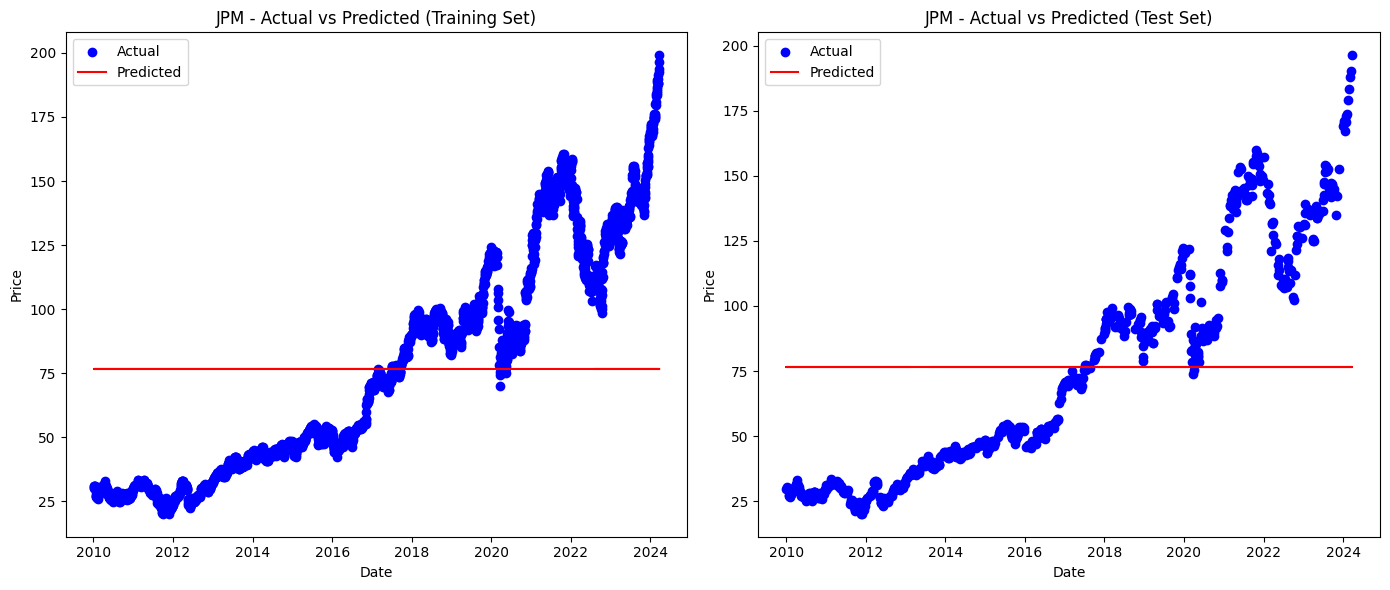

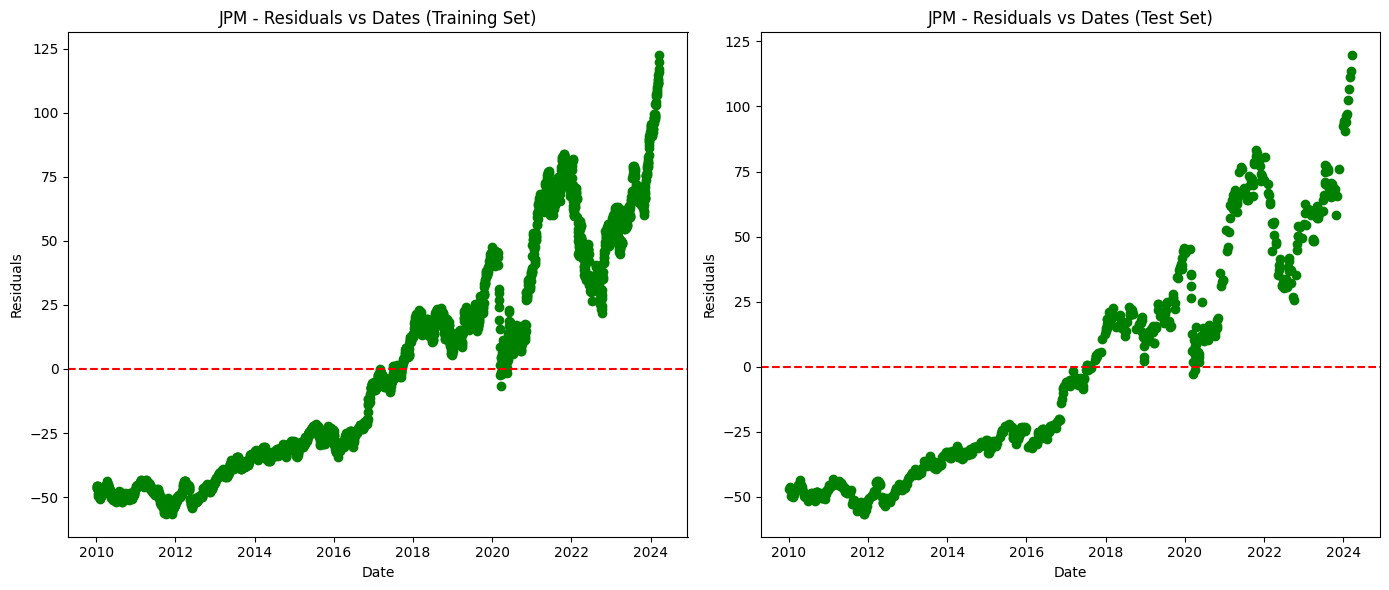

Summary for WMT:
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                nan
Time:                        19:06:40   Log-Likelihood:                -11359.
No. Observations:                2863   AIC:                         2.272e+04
Df Residuals:                    2862   BIC:                         2.273e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5645      0.239   

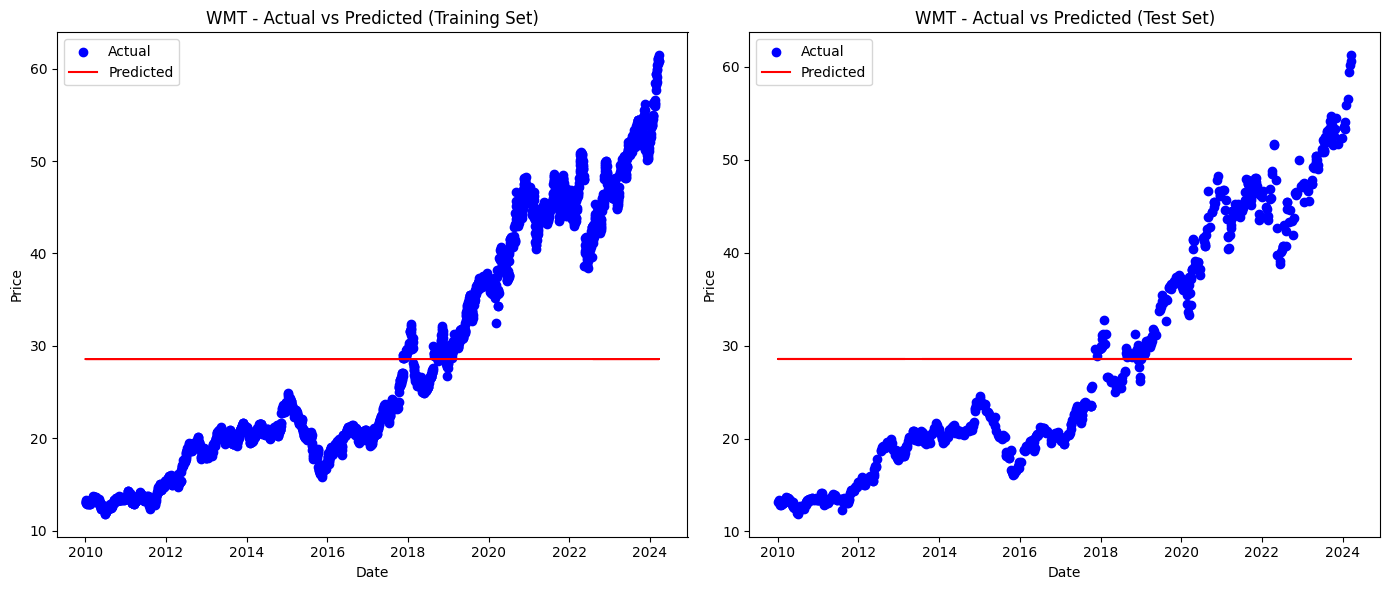

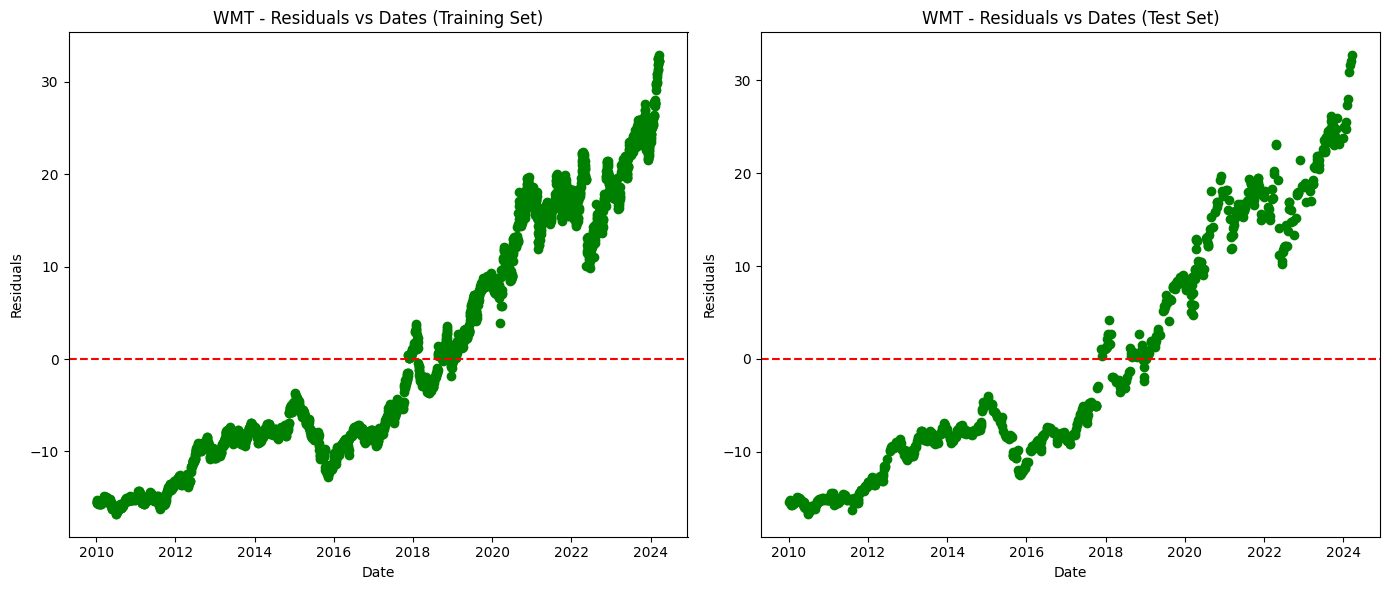

Summary for DIS:
                            OLS Regression Results                            
Dep. Variable:                    DIS   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                nan
Time:                        19:06:41   Log-Likelihood:                -14613.
No. Observations:                2863   AIC:                         2.923e+04
Df Residuals:                    2862   BIC:                         2.923e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.8913      0.745   

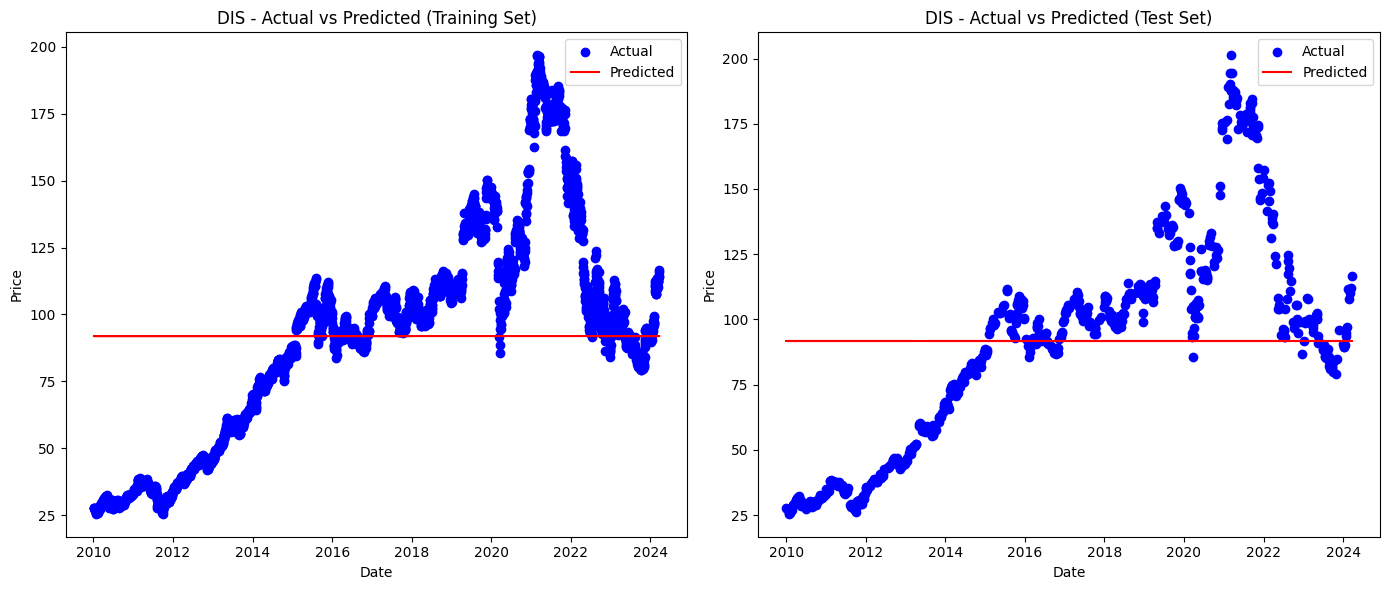

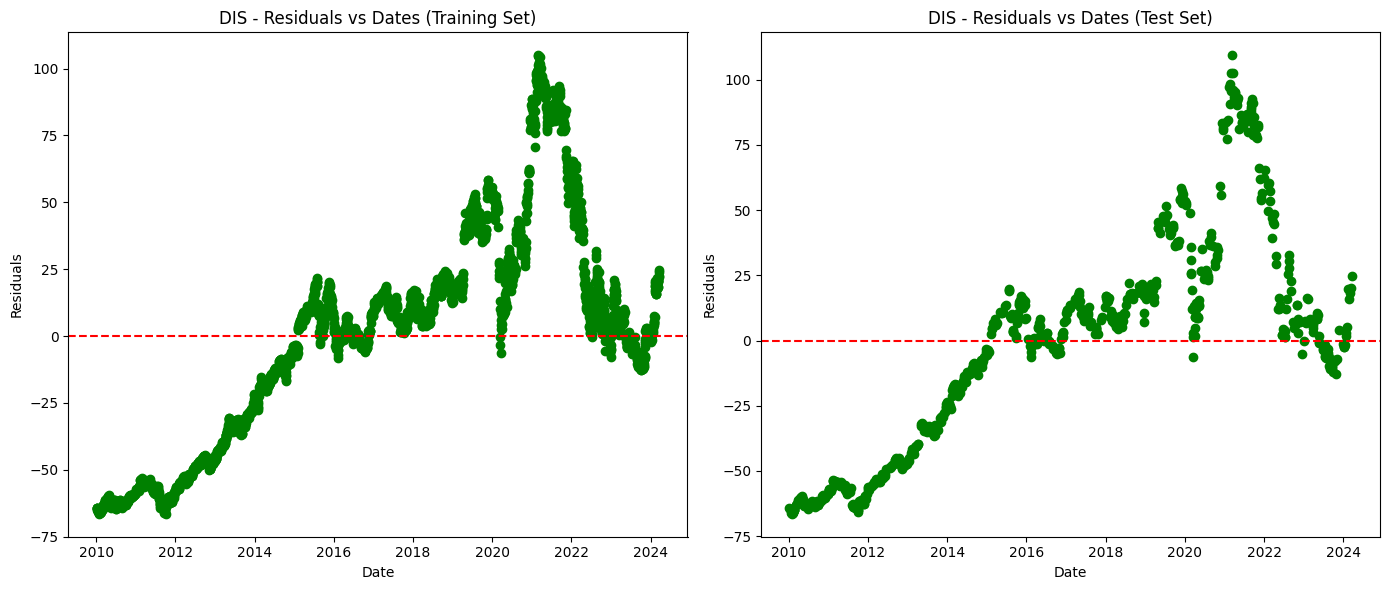

In [18]:
# Step 6: Main Function
def main():
    # Define parameters
    tickers = ['JPM', 'WMT', 'DIS']
    start_date = '2010-01-01'
    end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

    # Fetch stock data
    stock_df = fetch_stock_data(tickers, start_date, end_date)

    # Train models, print summaries, and evaluate
    for ticker in tickers:
        model, X_train, X_test, y_train, y_test = train_ols_model(stock_df[[ticker]])
        dates_train = X_train.index
        dates_test = X_test.index
        print_model_summary(model, ticker)
        evaluate_model(model, X_train, X_test, y_train, y_test, ticker)
        assess_goodness_of_fit(model, X_train, X_test, y_train, y_test, ticker, dates_train, dates_test)

if __name__ == "__main__":
    main()

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">

Based on the experiment, I conclude that training regression models on historical stock price data provides valuable insights into stock price prediction. By evaluating model performance metrics and assessing goodness of fit, I gained confidence in their predictive capabilities, aiding informed investment decisions.
    </td>
    </td>
  </tr>
</tbody>
</table> 